In [135]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import scipy as sp

def modulus_plotter(df_mean, df_std, runs):
    # Modulus compression plotting
    modulus = df_mean['Stress']/df_mean['Strain']
    std = df_std['Stress']/df_mean['Strain']

    fig, ax1 = plt.subplots() 
    
    ax1.set_xlabel('Time [s]') 
    ax1.set_ylabel('Modulus [Pa]') 
    ax1.plot(df_mean['Time'], modulus, label = 'Modulus [Pa]')
    ax1.fill_between(df_mean['Time'], [max(this, 0) for this in modulus-std],  modulus+std,  color = 'grey', alpha=0.4) 
    ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    
    ax2 = ax1.twinx() 
    
    ax2.set_ylabel('Boundary strain') 
    ax2.plot(df_mean['Time'], df_mean['Strain'], color = 'orange', linestyle = ':', label = 'Boundary strain') 
    ax2.tick_params(axis ='y') 

    #ax2.text(0.85, 0.93, r"$\frac{G^{\prime\prime}}{G^{\prime}}= $" + f"{np.round(gamma, 3)}", fontsize=15, horizontalalignment='center', verticalalignment='center', transform=ax2.transAxes)

    fig.legend(loc = 1)  
    plt.title(f'Modulus G*, n = {runs}')
    plt.show() 

def runs_get_data(experiments):
    #create an added dataframe of all experiments in the run
    df = pd.DataFrame()
    for idx, experiment in enumerate(experiments):
        filename = (path_name + experiment + "\\Stress_strain").replace('\\', '/')
        pre_df = pd.read_csv(filename)
        pre_df = pre_df.replace('-nan(ind)', '0.0000')  # Replace all -nan(ind) values with 0.0000
        if idx == 0:
            df = pre_df.copy()  # Initialize the DataFrame
        else:
            df = pd.concat([df, pre_df], axis=0) # concataneta all columns

    # Compute means and standard deviations
    df_mean = df.groupby(['Time']).mean(numeric_only=True).reset_index() # group per time step and average within this group
    df_std = df.groupby(['Time']).std(numeric_only=True).reset_index() # find the standard deviation of each time step

    len_before = df.shape[0]  # Rows before averaging
    len_after = df_mean.shape[0]  # Rows after averaging
    runs = int(len_before / len_after)  # Total runs

    # Return mean, std, and the number of averaged runs
    return [df_mean, df_std, runs]

def monoExp(x, t):
    return np.exp(-(x-1.0) / t)


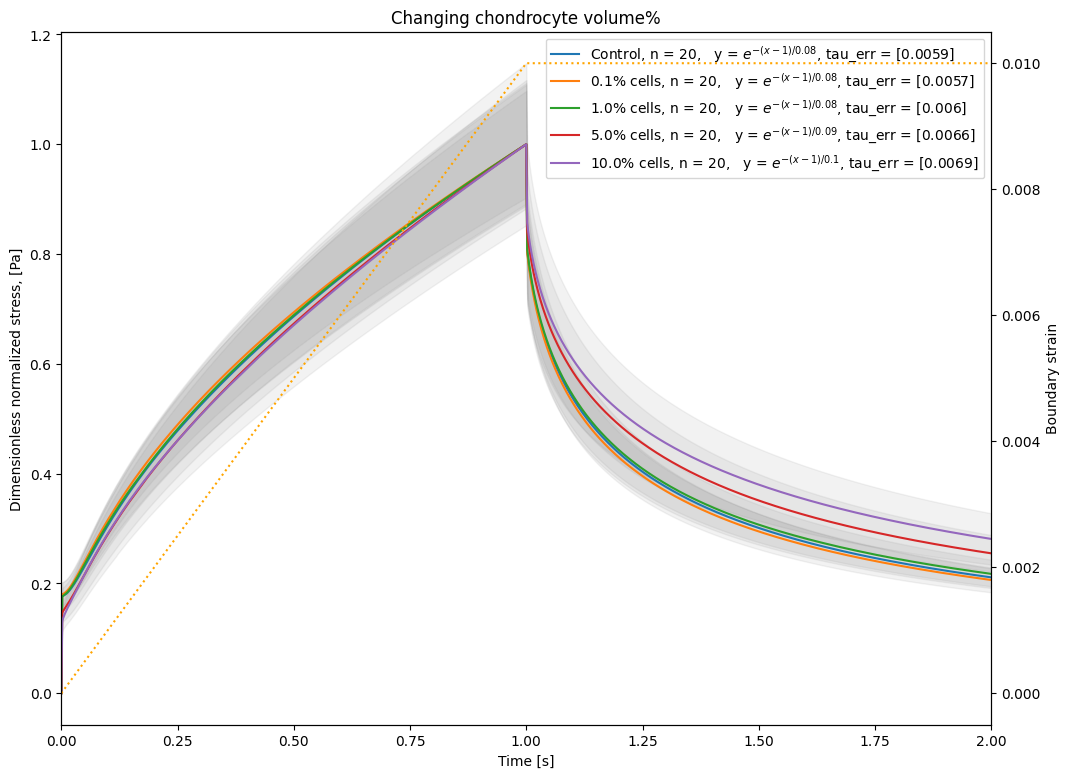

In [136]:

path_name = "C:\\Users\\friso\\BEP\\Raw_data\\chondrocyte_concentration\\Data\\"  # not used in the report#create dictionary with dataset per experiments, each row is a repeated experiment

folder_names = [item for item in os.listdir(path_name) if os.path.isdir(os.path.join(path_name, item))]
experiment_numbers = [int(name.split("_")[-1]) for name in folder_names]
folder_names = [name for _, name in sorted(zip(experiment_numbers, folder_names))]

data_a = folder_names[0:20]
data_b = folder_names[20:40]
data_c = folder_names[40:60]
data_d = folder_names[60:80]
data_e = folder_names[80:100]

total_data = {}

total_data['Control'] = data_a
total_data['0.1% cells'] = data_b
total_data['1.0% cells'] = data_c
total_data['5.0% cells'] = data_d
total_data['10.0% cells' ] = data_e


data_dict = {}
for key in total_data:
    data_dict[key] = runs_get_data(total_data[key])

fig, ax1 = plt.subplots(figsize=(12, 9))

for key in data_dict:

    df_mean = data_dict[key][0]
    ax2 = ax1.twinx()  
    ax2.set_ylabel('Boundary strain') 
    ax2.plot(df_mean['Time'], df_mean['Strain'], color = 'orange', linestyle = ':', label = 'Boundary strain') 
    ax2.tick_params(axis ='y') 
    break


for key in data_dict:
    df_mean = data_dict[key][0]
    df_std = data_dict[key][1]
    runs = data_dict[key][2]
    modulus = df_mean['Stress'] / df_mean['Stress'].max() #- df_mean['Stress'].min()) 
    std = df_std['Stress'] / df_mean['Stress'].max() #- df_mean['Stress'].min()) 

    # calculate exponential fit
    exponential_df = df_mean[df_mean['Time'] >= 1.0]
    exponential_df = exponential_df[exponential_df['Time'] <= 1.05]
    exp_xdata = exponential_df['Time']
    exp_ydata = exponential_df['Stress'] / exponential_df['Stress'].max()
    popt, pcov = sp.optimize.curve_fit(monoExp, exp_xdata, exp_ydata)
    popt = np.round(popt, 2)

    perr = np.round(np.sqrt(np.diag(pcov)), 4)
    #this_label = key + f", n = {runs}" + rf"y = ${popt[0]}*e^{ -{popt[1]} } + {popt[2]}$"
    #this_label = f"{key}, n = {runs},   y = ${popt[0]}e^{{-(x-1) / {popt[1]}}} + {popt[2]}$, p_err = {perr.flatten()}"
    this_label = f"{key}, n = {runs},   y = $e^{{-(x-1) / {popt[0]}}}$, tau_err = {perr.flatten()}"


    # plot data
    ax1.plot(df_mean['Time'], modulus, label = this_label)
    ax1.fill_between(df_mean['Time'], [max(this, 0) for this in modulus-std],  modulus+std,  color = 'grey', alpha=0.1) 
    ax1.set_xlabel('Time [s]') 
    ax1.set_ylabel('Dimensionless normalized stress, [Pa]') 
    ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))


plt.title(f'Changing chondrocyte volume%')
plt.xlim(0, 2)
#plt.ylim(0, 1.2)
ax1.legend()


plt.show()   

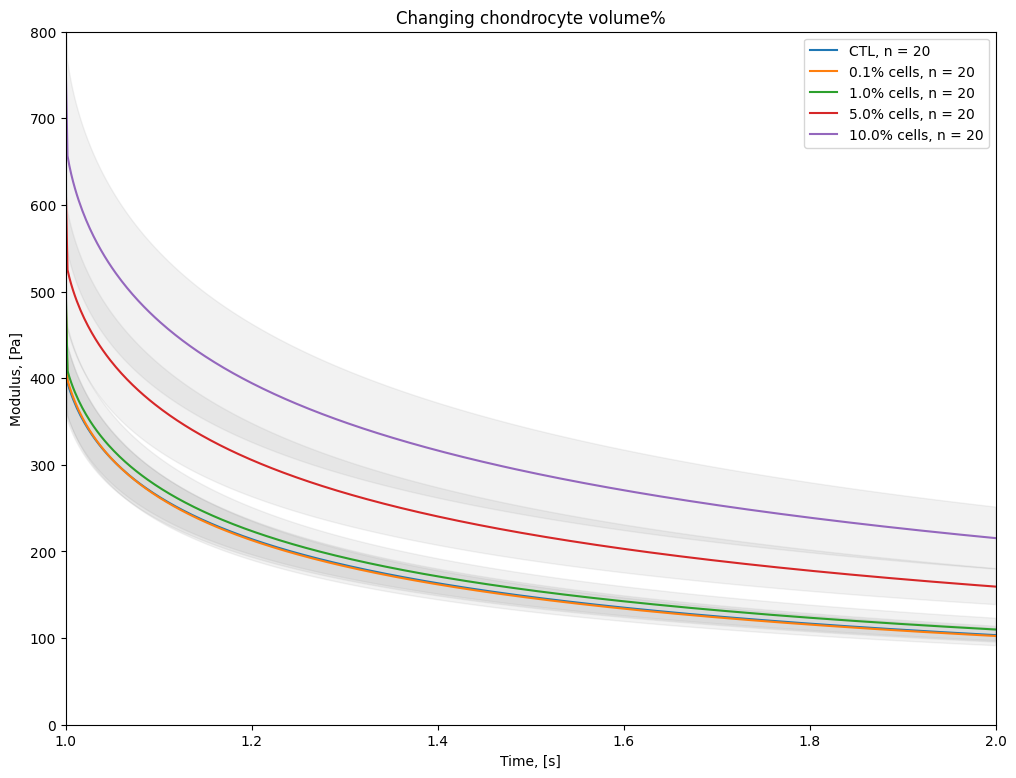

In [137]:
#create dictionary with dataset per experiments, each row is a repeated experiment

data_a = folder_names[0:20]
data_b = folder_names[20:40]
data_c = folder_names[40:60]
data_d = folder_names[60:80]
data_e = folder_names[80:100]

total_data = {}

total_data['CTL'] = data_a
total_data['0.1% cells'] = data_b
total_data['1.0% cells'] = data_c
total_data['5.0% cells'] = data_d
total_data['10.0% cells' ] = data_e


data_dict = {}
for key in total_data:
    data_dict[key] = runs_get_data(total_data[key])

fig, ax1 = plt.subplots(figsize=(12, 9)) 
for key in data_dict:
    df_mean = data_dict[key][0]
    df_std = data_dict[key][1]
    runs = data_dict[key][2]
    modulus = df_mean['Stress'] / df_mean['Strain'] 
    std = df_std['Stress'] / df_mean['Strain'] 
    
    ax1.plot(df_mean['Time'], modulus, label = key + f", n = {runs}")
    ax1.fill_between(df_mean['Time'], [max(this, 0) for this in modulus-std],  modulus+std,  color = 'grey', alpha=0.1) 

plt.title(f'Changing chondrocyte volume%')
plt.legend()
plt.xlabel('Time, [s]')
plt.ylabel('Modulus, [Pa]')
plt.xlim(1.0, 2.0)
plt.ylim(0, 800)


plt.show()   

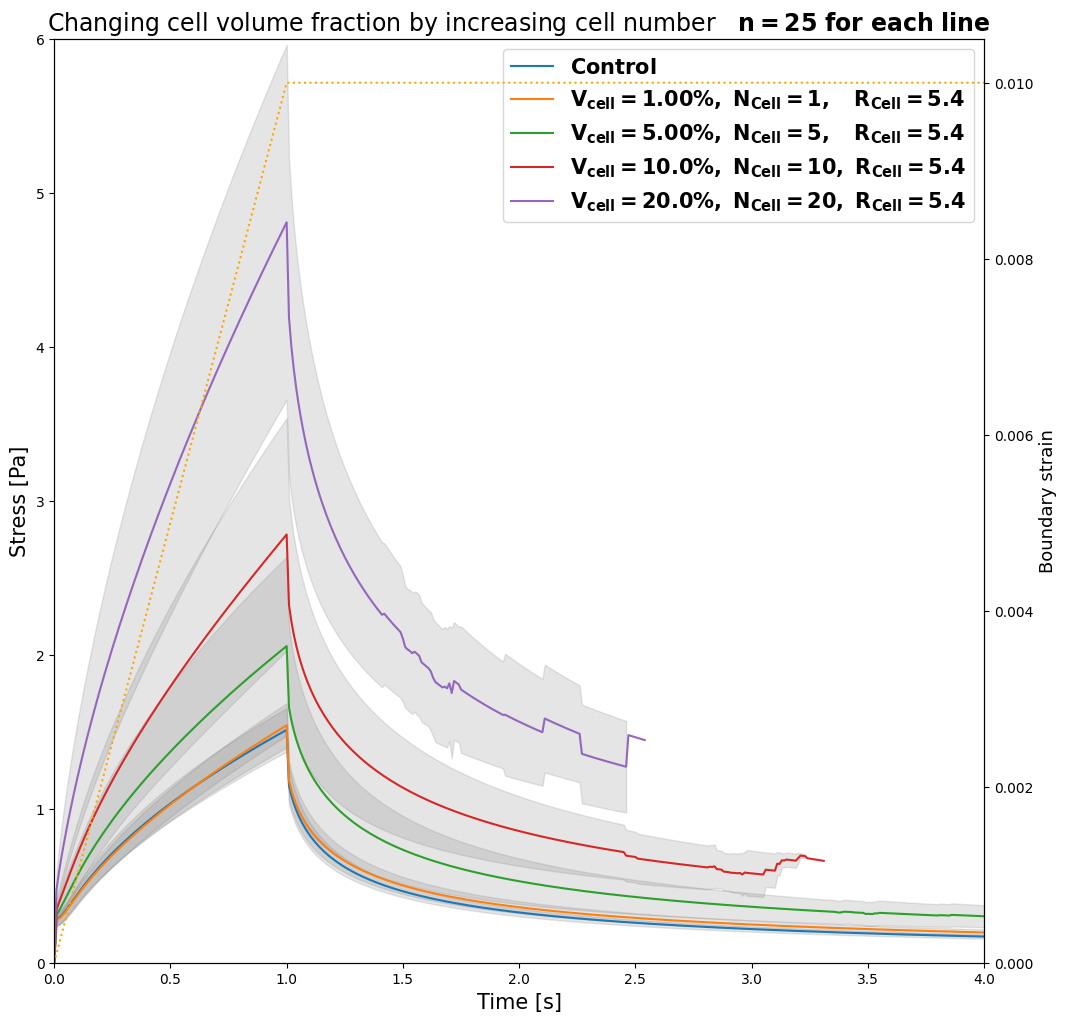

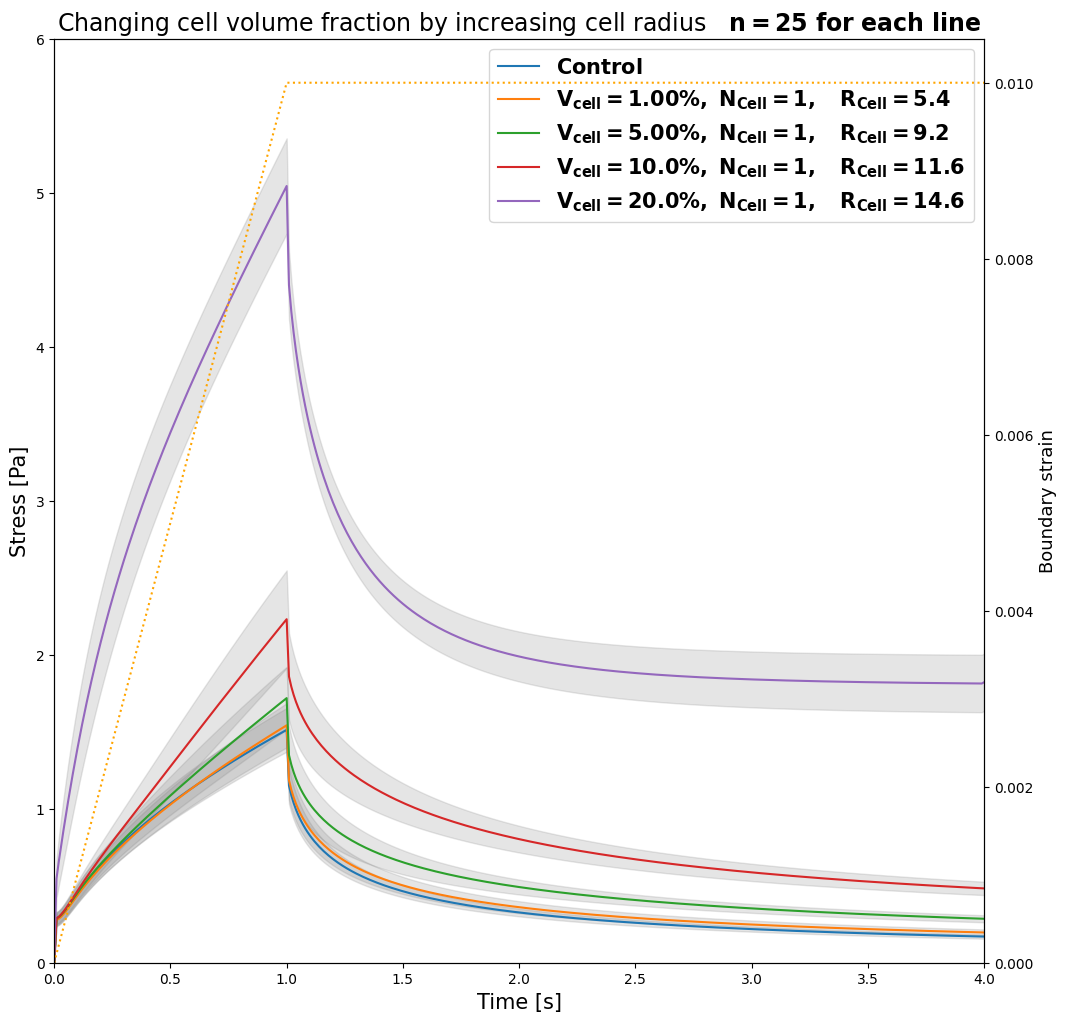

In [138]:
path_name = "C:\\Users\\friso\\BEP\\Raw_data\\final_volume\\Data\\" # used in the report

folder_names = [item for item in os.listdir(path_name) if os.path.isdir(os.path.join(path_name, item))]
experiment_numbers = [int(name.split("_")[-1]) for name in folder_names]
folder_names = [name for _, name in sorted(zip(experiment_numbers, folder_names))]

data_a = folder_names[0:25]
data_b = folder_names[25:50]
data_c = folder_names[50:75]
data_d = folder_names[75:100]
data_e = folder_names[100:125]
data_f = folder_names[125:150]
data_g = folder_names[150:175]
data_h = folder_names[175:200]

total_data = {}

key_a = r"$\bf{Control}$"
key_b = r"$\bf{ V_{cell}=1.00\%,\ N_{Cell}=1,\ \ \ R_{Cell}=5.4}$"
key_c = r"$\bf{ V_{cell}=5.00\%,\ N_{Cell}=5,\ \ \ R_{Cell}=5.4}$"
key_d = r"$\bf{ V_{cell}=10.0\%,\ N_{Cell}=10,\ R_{Cell}=5.4}$"
key_e = r"$\bf{ V_{cell}=20.0\%,\ N_{Cell}=20,\ R_{Cell}=5.4}$"
key_f = r"$\bf{ V_{cell}=5.00\%,\ N_{Cell}=1,\ \ \ R_{Cell}=9.2}$"
key_g = r"$\bf{ V_{cell}=10.0\%,\ N_{Cell}=1,\ \ \ R_{Cell}=11.6}$"
key_h = r"$\bf{ V_{cell}=20.0\%,\ N_{Cell}=1,\ \ \ R_{Cell}=14.6}$"

total_data[key_a] = data_a

total_data[key_b] = data_b
total_data[key_c] = data_c
total_data[key_d] = data_d
total_data[key_e] = data_e

total_data[key_f] = data_f
total_data[key_g] = data_g
total_data[key_h] = data_h

more_cells =    [key_a, key_b, key_c, key_d, key_e]
bigger_radius = [key_a, key_b, key_f, key_g, key_h]

data_dict = {}
for key in total_data:
    data_dict[key] = runs_get_data(total_data[key])

fig, ax1 = plt.subplots(figsize=(12, 12))

for key in data_dict: # to plot strain curve
    df_mean = data_dict[key][0]
    ax2 = ax1.twinx()  
    ax2.set_ylabel('Boundary strain', size = 13) 
    ax2.plot(df_mean['Time'], df_mean['Strain'], color = 'orange', linestyle = ':', label = 'Boundary strain') 
    ax2.tick_params(axis ='y') 
    break


for key in more_cells:
    df_mean = data_dict[key][0]
    df_std = data_dict[key][1]
    runs = data_dict[key][2]
    modulus = df_mean['Stress'] #/ df_mean['Stress'].max() #- df_mean['Stress'].min()) 
    std = df_std['Stress'] #/ df_mean['Stress'].max() #- df_mean['Stress'].min()) 

    this_label = key
    # plot data
    ax1.plot(df_mean['Time'], modulus, label = this_label)
    ax1.fill_between(df_mean['Time'], [max(this, 0) for this in modulus-std],  modulus+std,  color = 'grey', alpha=0.2) 
    ax1.set_xlabel('Time [s]', size = 15) 
    ax1.set_ylabel('Stress [Pa]', size = 15) 
    ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))


plt.title(f'Changing cell volume fraction by increasing cell number' r"$\bf{\ \ \ n=25\ for\ each\ line}$", size = 17)
ax1.set_xlim(xmin = 0, xmax=4)
ax1.set_ylim(0, 6.0)
ax2.set_ylim(ymin = 0)
ax1.legend(fontsize = 15)
plt.show()   



fig, ax1 = plt.subplots(figsize=(12, 12))

for key in data_dict: # to plot strain curve
    df_mean = data_dict[key][0]
    ax2 = ax1.twinx()  
    ax2.set_ylabel('Boundary strain', size = 13) 
    ax2.plot(df_mean['Time'], df_mean['Strain'], color = 'orange', linestyle = ':', label = 'Boundary strain') 
    ax2.tick_params(axis ='y') 
    break


for key in bigger_radius:
    df_mean = data_dict[key][0]
    df_std = data_dict[key][1]
    runs = data_dict[key][2]
    modulus = df_mean['Stress'] #/ df_mean['Stress'].max() #- df_mean['Stress'].min()) 
    std = df_std['Stress'] #/ df_mean['Stress'].max() #- df_mean['Stress'].min()) 

    this_label = key
    # plot data
    ax1.plot(df_mean['Time'], modulus, label = this_label)
    ax1.fill_between(df_mean['Time'], [max(this, 0) for this in modulus-std],  modulus+std,  color = 'grey', alpha=0.2) 
    ax1.set_xlabel('Time [s]', size = 15) 
    ax1.set_ylabel('Stress [Pa]', size = 15) 
    ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))


plt.title(f'Changing cell volume fraction by increasing cell radius' r"$\bf{\ \ \ n=25\ for\ each\ line}$", size = 17)
ax1.set_xlim(xmin = 0, xmax=4)
ax1.set_ylim(0, 6.0)
ax2.set_ylim(ymin = 0)
ax1.legend(fontsize = 15)
plt.show() 

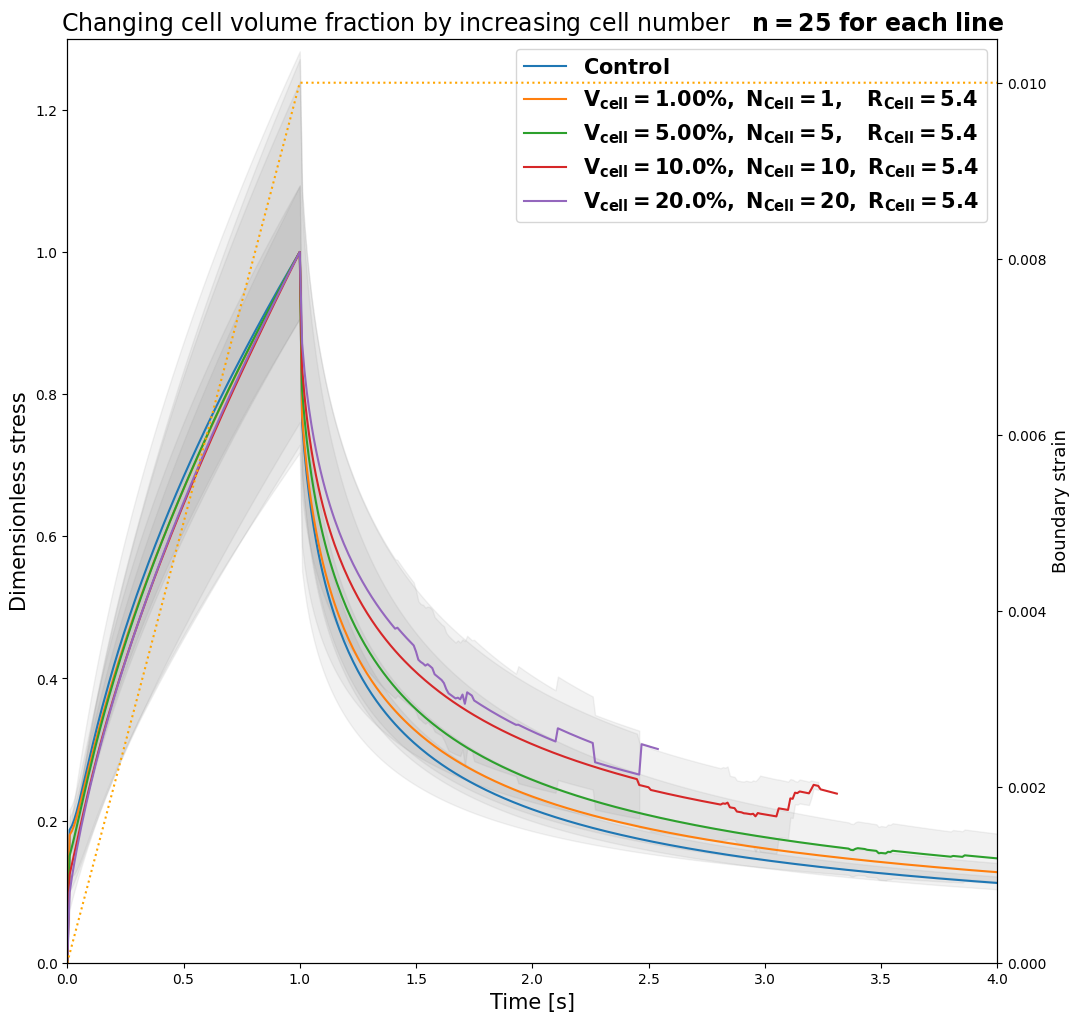

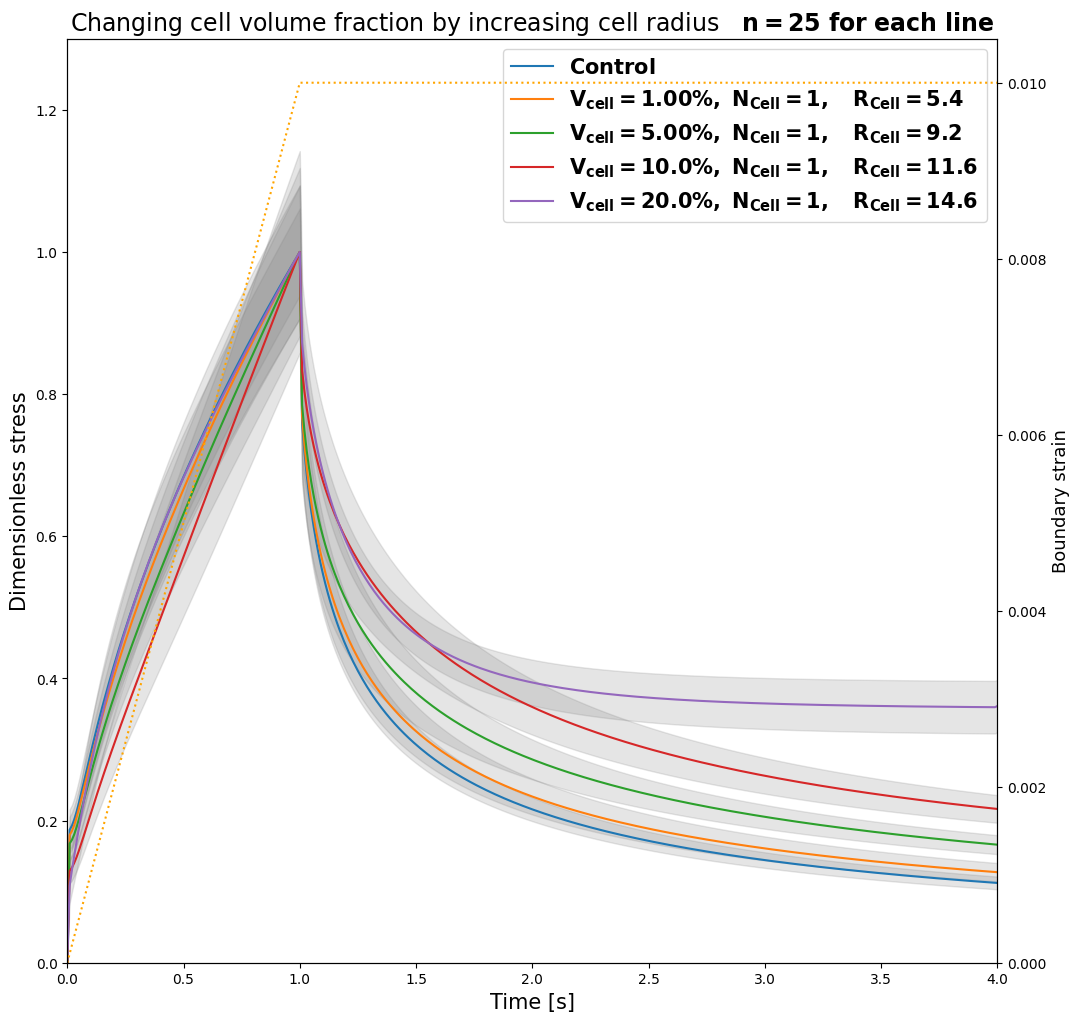

In [139]:
fig, ax1 = plt.subplots(figsize=(12, 12))

for key in data_dict: # to plot strain curve
    df_mean = data_dict[key][0]
    ax2 = ax1.twinx()  
    ax2.set_ylabel('Boundary strain', size = 13) 
    ax2.plot(df_mean['Time'], df_mean['Strain'], color = 'orange', linestyle = ':', label = 'Boundary strain') 
    ax2.tick_params(axis ='y') 
    break


for key in more_cells:
    df_mean = data_dict[key][0]
    df_std = data_dict[key][1]
    runs = data_dict[key][2]
    modulus = df_mean['Stress'] / df_mean['Stress'].max()
    std = df_std['Stress'] / df_mean['Stress'].max()

    this_label = key
    # plot data
    ax1.plot(df_mean['Time'], modulus, label = this_label)
    ax1.fill_between(df_mean['Time'], [max(this, 0) for this in modulus-std],  modulus+std,  color = 'grey', alpha=0.1) 
    ax1.set_xlabel('Time [s]', size = 15) 
    ax1.set_ylabel('Dimensionless stress', size = 15) 
    ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))


plt.title(f'Changing cell volume fraction by increasing cell number' r"$\bf{\ \ \ n=25\ for\ each\ line}$", size = 17)
ax1.set_xlim(xmin = 0, xmax=4)
ax1.set_ylim(ymin = 0, ymax=1.3)
ax2.set_ylim(ymin = 0)
ax1.legend(fontsize = 15)
plt.show()   



fig, ax1 = plt.subplots(figsize=(12, 12))

for key in data_dict: # to plot strain curve
    df_mean = data_dict[key][0]
    ax2 = ax1.twinx()  
    ax2.set_ylabel('Boundary strain', size = 13) 
    ax2.plot(df_mean['Time'], df_mean['Strain'], color = 'orange', linestyle = ':', label = 'Boundary strain') 
    ax2.tick_params(axis ='y') 
    break


for key in bigger_radius:
    df_mean = data_dict[key][0]
    df_std = data_dict[key][1]
    runs = data_dict[key][2]
    modulus = df_mean['Stress'] / df_mean['Stress'].max()
    std = df_std['Stress'] / df_mean['Stress'].max()

    this_label = key
    # plot data
    ax1.plot(df_mean['Time'], modulus, label = this_label)
    ax1.fill_between(df_mean['Time'], [max(this, 0) for this in modulus-std],  modulus+std,  color = 'grey', alpha=0.2) 
    ax1.set_xlabel('Time [s]', size = 15) 
    ax1.set_ylabel('Dimensionless stress', size = 15) 
    ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))


plt.title(f'Changing cell volume fraction by increasing cell radius' r"$\bf{\ \ \ n=25\ for\ each\ line}$", size = 17)
ax1.set_xlim(xmin = 0, xmax=4)
ax1.set_ylim(ymin = 0, ymax=1.3)
ax2.set_ylim(ymin = 0)
ax1.legend(fontsize = 15)
plt.show() 